In [48]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

READ DATA

In [49]:
(train_data, test_data), ds_info = tfds.load(name="emnist/digits",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True, # Data gets returned in tuple format (data, label)
                                             with_info=True)

In [50]:
train_data = train_data.concatenate(test_data)

In [51]:
dataset = []
label_var = []
for image, label in tfds.as_numpy(train_data):
  if label not in label_var: label_var.append(label)
  dataset.append({
      'image' : image,
      'label' : int(label)
  })

In [52]:
dataset_per_label = []
for label in label_var:
  dataset_per_label.append([])

for number in dataset:
  dataset_per_label[number['label']].append(number)

In [53]:
percentage = 1
new_data = []

for label in dataset_per_label:
  num = int(len(label) * percentage / 100)
  new_data.append(np.random.choice(label, num, replace=False))

for i in range(len(new_data)):
  print(i, len(new_data[i]))

0 280
1 280
2 280
3 280
4 280
5 280
6 280
7 280
8 280
9 280


In [54]:
new_data = np.array(new_data)

In [55]:
new_data=new_data.flatten()

In [56]:
len(new_data)

2800

In [57]:
import pickle

In [58]:
with open('dataset.pkl', 'wb') as f:
    pickle.dump(new_data, f)

In [ ]:
with open('dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [59]:
X = []
Y = []
for i in range(len(new_data)):
  X.append(tf.cast(new_data[i]['image'], tf.float32) / 255)
  Y.append(tf.one_hot(new_data[i]['label'], depth=10))

X = np.array(X)
Y = np.array(Y)

In [60]:
with open('datax.pkl','wb') as f:
    pickle.dump(X, f)

with open('datay.pkl','wb') as f:
    pickle.dump(Y, f)

In [ ]:
with open('datax.pkl','rb') as f:
    X = pickle.load(f)
with open('datay.pkl','rb') as f:
    Y = pickle.load(f)

In [61]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
with open('x_train.pkl','wb') as f:
    pickle.dump(Xtrain, f)

with open('y_train.pkl','wb') as f:
    pickle.dump(Ytrain, f)

with open('x_test.pkl','wb') as f:
    pickle.dump(Xtest, f)

with open('y_test.pkl','wb') as f:
    pickle.dump(Ytest, f)

In [ ]:
with open('x_train.pkl','rb') as f:
    Xtrain = pickle.load(f)
with open('y_train.pkl','rb') as f:
    Ytrain = pickle.load(f)

with open('x_test.pkl','rb') as f:
    Xtest = pickle.load(f)
with open('y_test.pkl','rb') as f:
    Ytest = pickle.load(f)

Data Plotting

In [63]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

Alexnet

In [64]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(28,28,1)),
        keras.layers.Conv2D(96, kernel_size=(3,3), strides=(1,1), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(256, kernel_size=(5,5), activation='relu',padding='same'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 96)        960       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 256)       614656    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 5, 5, 384)         885120    
                                                                 
 conv2d_15 (Conv2D)          (None, 5, 5, 384)        

In [65]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [66]:
history_alexnet = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

Epoch 1/10
140/140 [==============================] - 3s 14ms/step - loss: 1.7893 - accuracy: 0.3246 - val_loss: 0.7553 - val_accuracy: 0.6911
Epoch 2/10
140/140 [==============================] - 2s 12ms/step - loss: 0.4746 - accuracy: 0.8527 - val_loss: 0.3533 - val_accuracy: 0.8982
Epoch 3/10
140/140 [==============================] - 2s 12ms/step - loss: 0.2647 - accuracy: 0.9286 - val_loss: 0.7394 - val_accuracy: 0.8607
Epoch 4/10
140/140 [==============================] - 2s 12ms/step - loss: 0.1973 - accuracy: 0.9500 - val_loss: 0.1417 - val_accuracy: 0.9571
Epoch 5/10
140/140 [==============================] - 2s 12ms/step - loss: 0.1184 - accuracy: 0.9674 - val_loss: 0.4406 - val_accuracy: 0.9214
Epoch 6/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0942 - accuracy: 0.9741 - val_loss: 0.4648 - val_accuracy: 0.9214
Epoch 7/10
140/140 [==============================] - 2s 12ms/step - loss: 0.1502 - accuracy: 0.9585 - val_loss: 0.0853 - val_accuracy: 0.9768

In [67]:
with open('history_alexnet.pkl', 'wb') as f:
    pickle.dump(history_alexnet, f)

In [ ]:
with open('data_100persen/history_alexnet.pkl', 'rb') as f:
    history_alexnet = pickle.load(f)

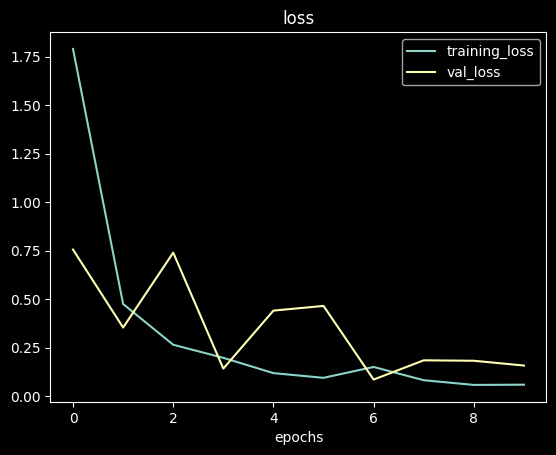

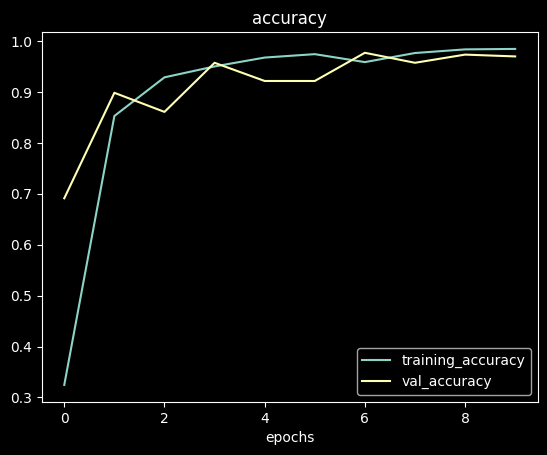

In [68]:
plot_loss_curves(history_alexnet)

LENET

In [69]:
model = keras.models.Sequential(
    [
      keras.layers.Input((28,28,1)),
      keras.layers.Conv2D(6, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Conv2D(16, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(120, activation='sigmoid'),
      keras.layers.Dense(84, activation='sigmoid'),
      keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 12, 12, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [70]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [71]:
history_lenet = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

Epoch 1/10
140/140 [==============================] - 2s 7ms/step - loss: 2.3215 - accuracy: 0.0982 - val_loss: 2.3419 - val_accuracy: 0.0964
Epoch 2/10
140/140 [==============================] - 1s 6ms/step - loss: 2.2698 - accuracy: 0.1585 - val_loss: 2.0925 - val_accuracy: 0.2839
Epoch 3/10
140/140 [==============================] - 1s 6ms/step - loss: 1.5526 - accuracy: 0.6335 - val_loss: 1.0366 - val_accuracy: 0.8232
Epoch 4/10
140/140 [==============================] - 1s 6ms/step - loss: 0.8552 - accuracy: 0.8223 - val_loss: 0.6316 - val_accuracy: 0.8786
Epoch 5/10
140/140 [==============================] - 1s 6ms/step - loss: 0.5683 - accuracy: 0.8692 - val_loss: 0.4380 - val_accuracy: 0.8964
Epoch 6/10
140/140 [==============================] - 1s 6ms/step - loss: 0.4310 - accuracy: 0.8982 - val_loss: 0.3476 - val_accuracy: 0.9089
Epoch 7/10
140/140 [==============================] - 1s 6ms/step - loss: 0.3502 - accuracy: 0.9138 - val_loss: 0.2837 - val_accuracy: 0.9250
Epoch 

In [72]:
with open('history_lenet.pkl', 'wb') as f:
    pickle.dump(history_lenet, f)

In [ ]:
with open('history_lenet.pkl', 'rb') as f:
    history_lenet = pickle.load(f)

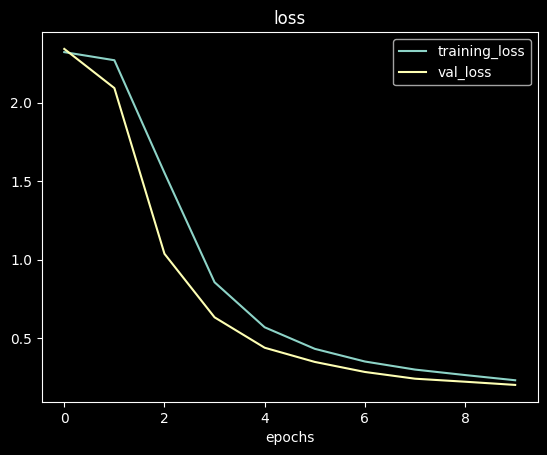

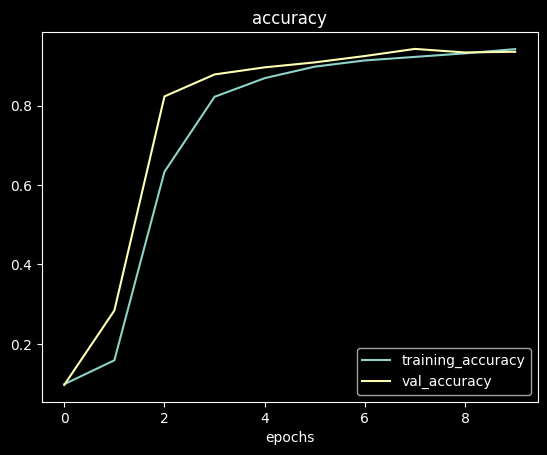

In [73]:
plot_loss_curves(history_lenet)

CUSTOM MODEL

In [ ]:
model = keras.models.Sequential(
    [
      keras.layers.Input((28,28,1)),

      keras.layers.Conv2D(6, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Conv2D(16, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(120, activation='sigmoid'),
      keras.layers.Dense(84, activation='sigmoid'),

      keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_custom = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

In [ ]:
with open('history_custom.pkl', 'wb') as f:
    pickle.dump(history_custom, f)

In [ ]:
with open('history_lenet.pkl', 'rb') as f:
    history_custom = pickle.load(f)

In [ ]:
plot_loss_curves(history_custom)